In [7]:
#import libaries

#For data analysis
import pandas as pd
import numpy as np

#for data visualization

import matplotlib.pyplot as plt
import seaborn as sns

#for data pre-processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

#Machine learning algorithms
#classifier libraries
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

#Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,roc_auc_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")


In [4]:
!pip install xgboost

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 660.6 kB/s eta 0:03:10
   ---------------------------------------- 0.1/124.9 MB 1.1 MB/s eta 0:01:59
   ---------------------------------------- 0.4/124.9 MB 3.3 MB/s eta 0:00:38
   ---------------------------------------- 1.0/124.9 MB 6.6 MB/s eta 0:00:19
   ---------------------------------------- 1.2/124.9 MB 5.8 MB/s eta 0:00:22
   - -------------------------------------- 3.2/124.9 MB 13.6 MB/s eta 0:00:09
   - -------------------------------------- 3.2/124.9 MB 12.9 MB/s eta 0:00:10
   - -------------------------------------- 4.8/124.9 MB 15.2 MB/s eta 0:00:08
   - -------------------------------------- 5.2/124.9 MB 16.8 MB/s eta 0:00:08
   - -------------------------------------- 5.8/124.9 MB 14.8 MB/s eta 0:00:09
   -- ------------------------------------- 7.1/124.9 MB 16.8 MB/s eta 

In [10]:
#load the excel dataset

Data = pd.read_excel(r"C:\Users\mojoy\Downloads\ML Supervised learning\heart.xlsx")

Data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Features in the dataset and meaning:
 1. age -age in years
 2. sex - (1=male, 0 = female)
 3. cp- chest pain type(0: no pain,1: typical angina 2, atypical angina, 3: non-anginal pain, 4: asymptomatic)
 4. trestbps - resting blood pressure (in mm HG on admission to the hospital)
 5. chol - serum cholestoral in mg/dl
 6. fbs-(fasting blood sugar > 120 mg/dl) (1= true; 0=false)
 7. restecg - resting electrocardiographoc results
 8. thalach - maximum heart rate achieved
 9. exang - exercise induced angina (1=yes,0=no)
 10. oldspeak - ST depression induced by exercise ST segment
 11. slope- the slope of the peak exercise ST segment
 12. ca - number of major vessels (0-3) colored by flourosopy
 13. thal -3 = normal, 6 = fixed defect, 7= reversable defect
 14. target - have disease or not (1= yes, 0= no)

In [11]:
#renaming the datasets

Data.columns = ['age','sex','chest_pain_type','resting_blood_pressure','cholesterol','fasting_blood_sugar','rest_ecg','max_heart_rate','exercise_induced_angina',
                'st_depression','st_slope','num_major_vessels','thalassemia','target']

Data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [12]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      303 non-null    int64  
 1   sex                      303 non-null    int64  
 2   chest_pain_type          303 non-null    int64  
 3   resting_blood_pressure   303 non-null    int64  
 4   cholesterol              303 non-null    int64  
 5   fasting_blood_sugar      303 non-null    int64  
 6   rest_ecg                 303 non-null    int64  
 7   max_heart_rate           303 non-null    int64  
 8   exercise_induced_angina  303 non-null    int64  
 9   st_depression            303 non-null    float64
 10  st_slope                 303 non-null    int64  
 11  num_major_vessels        303 non-null    int64  
 12  thalassemia              303 non-null    int64  
 13  target                   303 non-null    int64  
dtypes: float64(1), int64(13)
m

In [13]:
Data.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


age                        0
sex                        0
chest_pain_type            0
resting_blood_pressure     0
cholesterol                0
fasting_blood_sugar        0
rest_ecg                   0
max_heart_rate             0
exercise_induced_angina    0
st_depression              0
st_slope                   0
num_major_vessels          0
thalassemia                0
target                     0
dtype: int64


<Axes: >

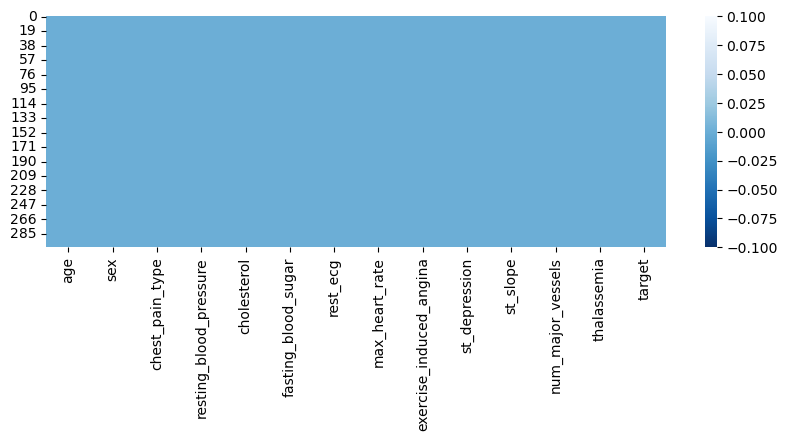

In [14]:
#check for missing values
print(Data.isnull().sum())

#visualize missing data if available
plt.figure(figsize= (10,3))
sns.heatmap(Data.isnull(),cbar=True,cmap ="Blues_r")

## Exploratory Data Analysis

### Univariate Analysis: Analyzing certain columns to understand the data and review for outliers

In [15]:
Data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

<Axes: xlabel='thalassemia'>

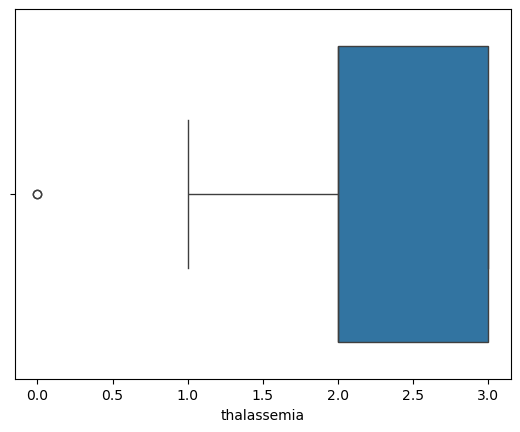

In [17]:
#check for outliers
sns.boxplot( x= Data["thalassemia"])

<Axes: xlabel='cholesterol'>

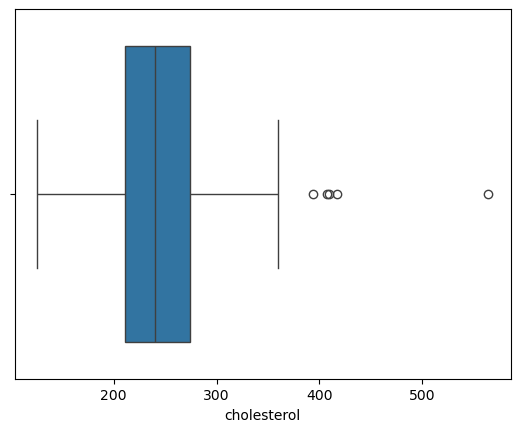

In [18]:
sns.boxplot( x= Data["cholesterol"])

<Axes: xlabel='resting_blood_pressure'>

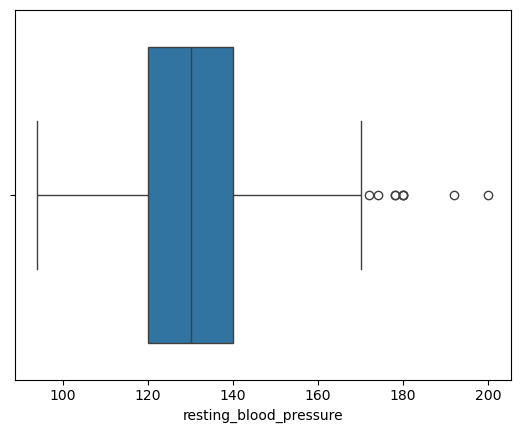

In [19]:
sns.boxplot( x= Data["resting_blood_pressure"])

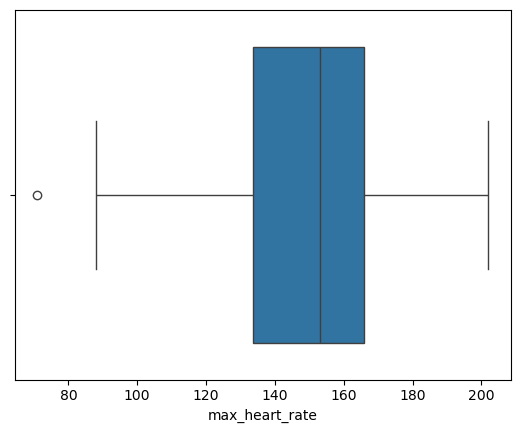

In [21]:
sns.boxplot( x= Data["max_heart_rate"]);

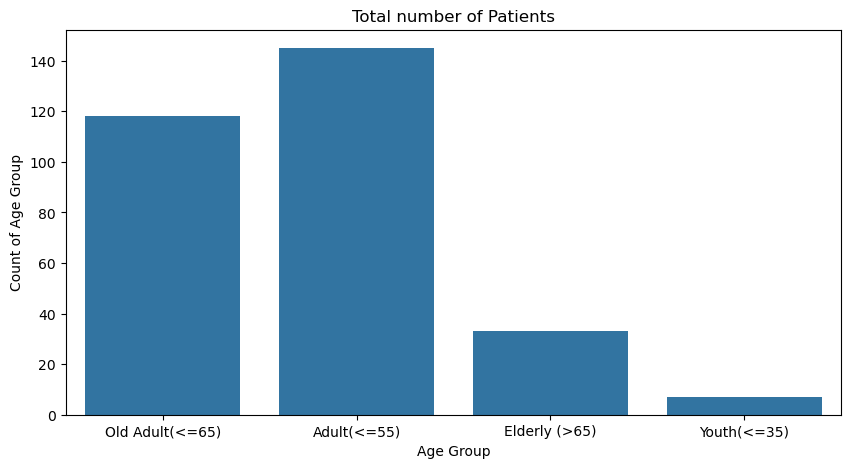

In [25]:
#Data Visualization
#Age Bracket
def age_bracket(age):
    if age <= 35:
        return "Youth(<=35)"
    elif age <=55:
        return "Adult(<=55)"
    elif age <= 65:
        return "Old Adult(<=65)"
    else:
        return "Elderly (>65)"

Data['age_bracket'] = Data['age'].apply(age_bracket)

#investigating the age group of patients

plt.figure(figsize = (10,5))
sns.countplot(x= 'age_bracket',data = Data)
plt.xlabel('Age Group')
plt.ylabel ('Count of Age Group')
plt.title ('Total number of Patients');

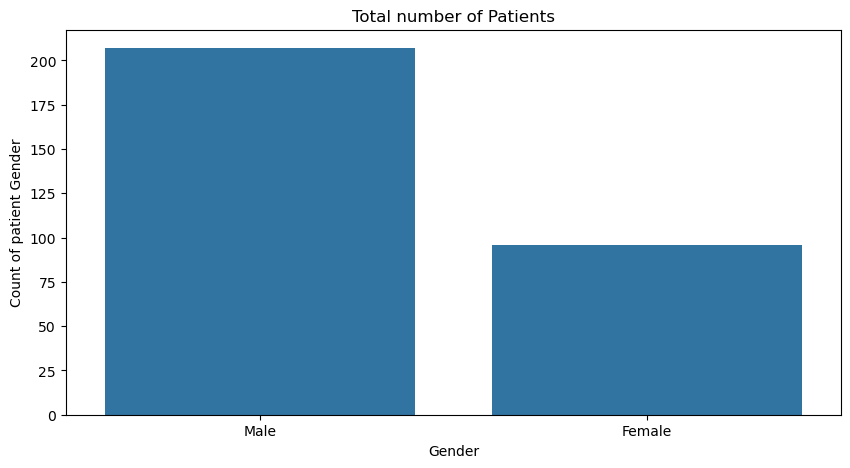

In [27]:
def gender(sex):
    if sex == 1:
        return "Male"
    else:
        return "Female"
   

Data['gender'] = Data['sex'].apply(gender)

#investigating the age group of patients

plt.figure(figsize = (10,5))
sns.countplot(x= 'gender',data = Data)
plt.xlabel('Gender')
plt.ylabel ('Count of patient Gender')
plt.title ('Total number of Patients');

In [28]:
Data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female


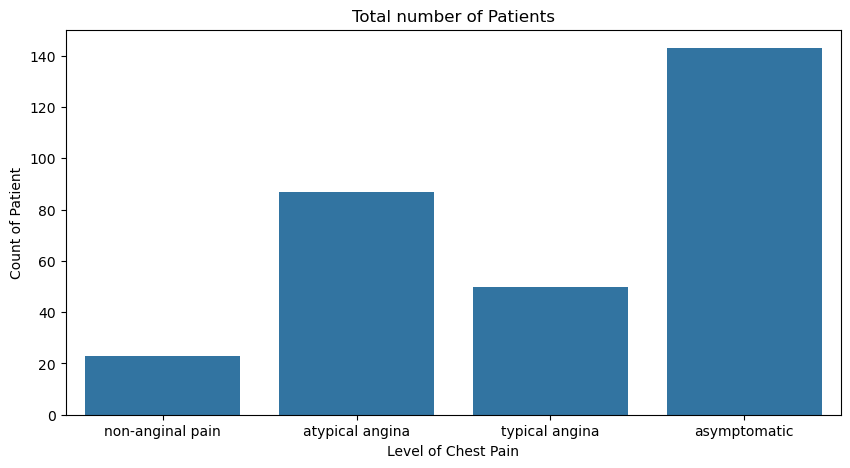

In [30]:
#chest pain type(0: no pain,1: typical angina 2, atypical angina, 3: non-anginal pain, 4: asymptomatic)
def chest_pain(cp):
    if cp == 1:
        return "typical angina"
    elif cp == 2:
        return "atypical angina"
    elif cp == 3:
        return "non-anginal pain"
    else:
        return "asymptomatic"


Data['cp_cat'] = Data['chest_pain_type'].apply(chest_pain)
plt.figure(figsize = (10,5))
sns.countplot(x= 'cp_cat',data = Data)
plt.xlabel('Level of Chest Pain')
plt.ylabel ('Count of Patient')
plt.title ('Total number of Patients');

In [31]:
Data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non-anginal pain
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical angina
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical angina
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male,typical angina
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female,asymptomatic


label
Yes    165
No     138
Name: count, dtype: int64


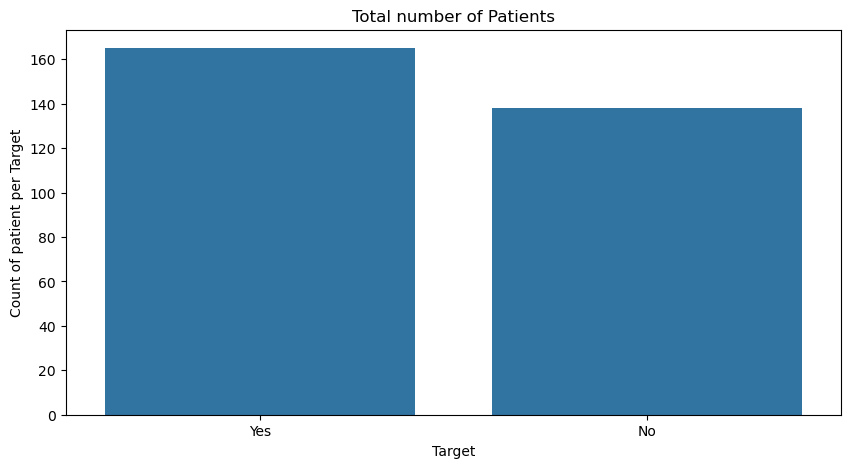

In [32]:
def label(tg):
    if tg == 1:
        return "Yes"
    else:
        return "No"
   

Data['label'] = Data['target'].apply(label)

#investigating the age group of patients
print(Data["label"].value_counts())

plt.figure(figsize = (10,5))
sns.countplot(x= 'label',data = Data)
plt.xlabel('Target')
plt.ylabel ('Count of patient per Target')
plt.title ('Total number of Patients');

In [33]:
Data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate',
       'exercise_induced_angina', 'st_depression', 'st_slope',
       'num_major_vessels', 'thalassemia', 'target', 'age_bracket', 'gender',
       'cp_cat', 'label'],
      dtype='object')

### Bivariate Analysis: comparing 2 columns 

In [34]:
Data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non-anginal pain,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical angina,Yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical angina,Yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male,typical angina,Yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female,asymptomatic,Yes


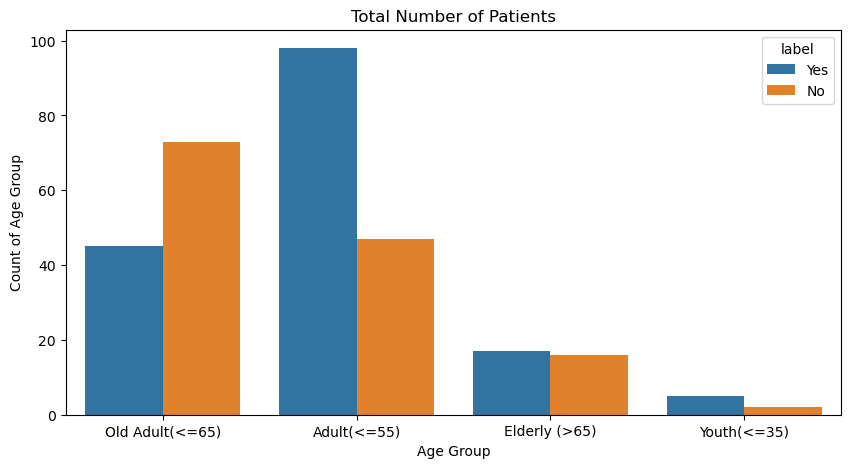

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(x='age_bracket',data=Data, hue='label')
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients');

In [37]:
Data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non-anginal pain,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical angina,Yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical angina,Yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male,typical angina,Yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female,asymptomatic,Yes


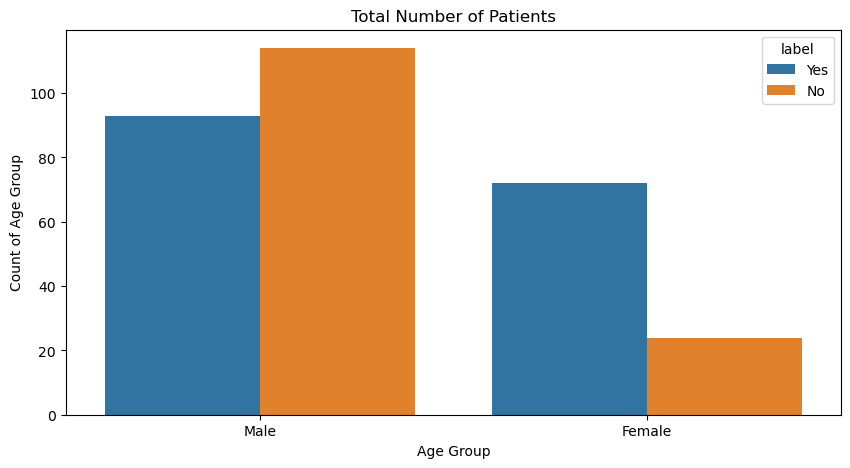

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(x='gender',data=Data, hue='label')
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients');

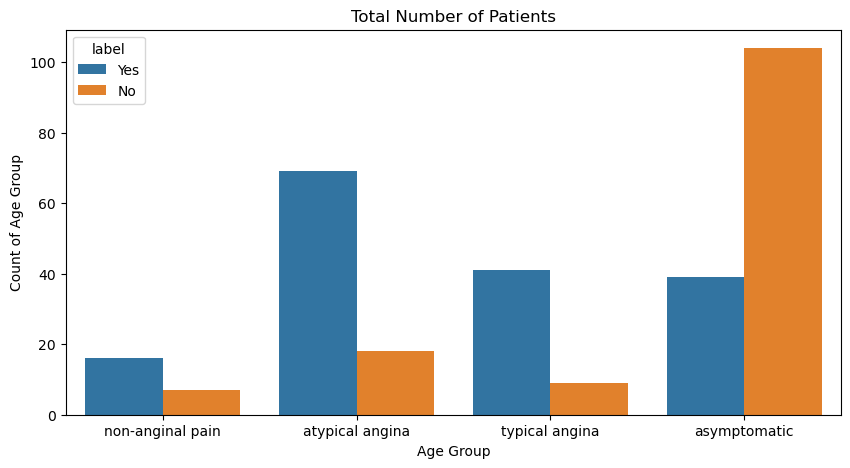

In [40]:
plt.figure(figsize=(10,5))
sns.countplot(x='cp_cat',data=Data, hue='label')
plt.xlabel('Age Group')
plt.ylabel('Count of Age Group')
plt.title('Total Number of Patients');

Update the analysis

### Multivariate Analysis

In [42]:
#correlation between saleprice and other variables in the data set

plt.figure(figsize=(10,10))
hm = sns.heatmap(Data.corr(),cbar= True, annot =True,square = True,fmt = ' .2f',
                 annot_kws={'size' : 10})

ValueError: could not convert string to float: 'Old Adult(<=65)'

<Figure size 1000x1000 with 0 Axes>

## Data Pre-Processing:
### Feature Engineering

In [43]:
Data.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target,age_bracket,gender,cp_cat,label
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,Old Adult(<=65),Male,non-anginal pain,Yes
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,Adult(<=55),Male,atypical angina,Yes
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,Adult(<=55),Female,typical angina,Yes
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,Old Adult(<=65),Male,typical angina,Yes
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,Old Adult(<=65),Female,asymptomatic,Yes


We will remove the categorical data i.e age_bracket,gender,cp_cat,label
then we will remove the target as that is the answer, we want to train the machine learning we have to do that by first removing the target.

In [51]:
data1= Data[['age','sex','chest_pain_type','resting_blood_pressure','cholesterol','fasting_blood_sugar','rest_ecg','max_heart_rate','exercise_induced_angina',
                'st_depression','st_slope','num_major_vessels','thalassemia','target']]
data1.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


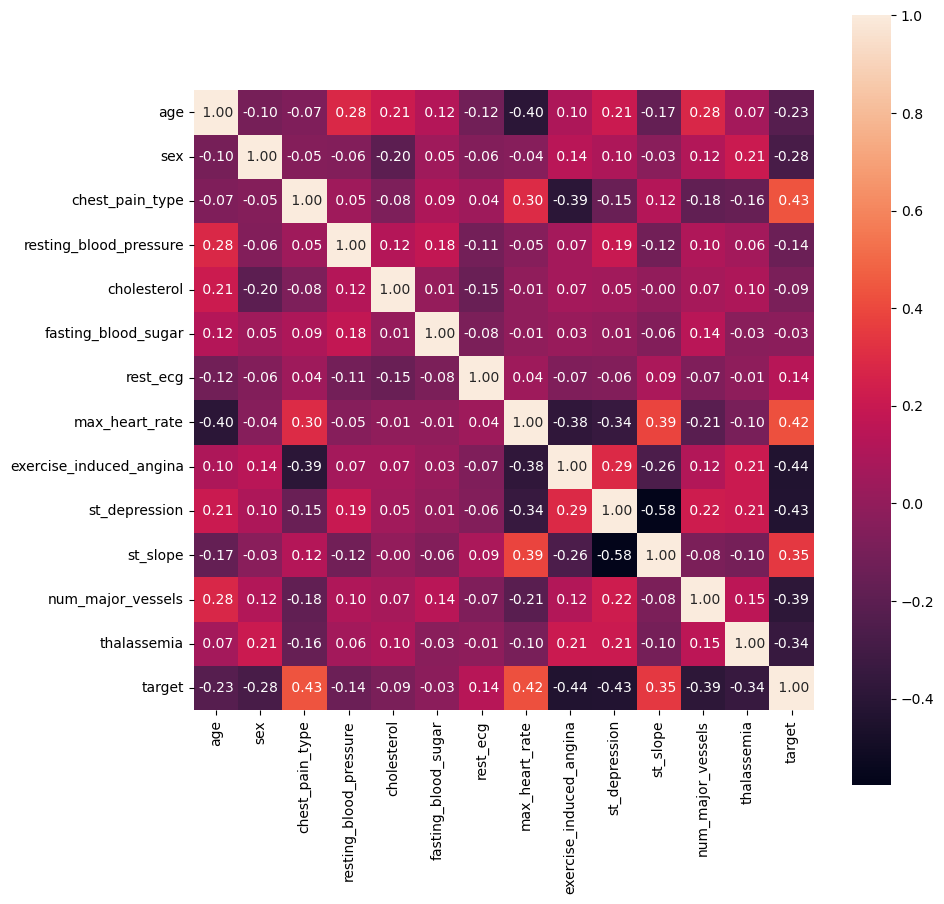

In [52]:

#Multivariate analysis#heatmap
plt.figure(figsize=(10,10))
hm = sns.heatmap(data1.corr(),cbar= True, annot =True,square = True,fmt = ' .2f',
                 annot_kws={'size' : 10})

In [55]:
data1= Data[['age','sex','chest_pain_type','resting_blood_pressure','cholesterol','fasting_blood_sugar','rest_ecg','max_heart_rate','exercise_induced_angina',
                'st_depression','st_slope','num_major_vessels','thalassemia']]

data1.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [56]:
label = Data[['target']]

In [57]:
label.head()

,target
0,1
1,1
2,1
3,1
4,1


In [58]:
data1.dtypes

age                          int64
sex                          int64
chest_pain_type              int64
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar          int64
rest_ecg                     int64
max_heart_rate               int64
exercise_induced_angina      int64
st_depression              float64
st_slope                     int64
num_major_vessels            int64
thalassemia                  int64
dtype: object

In [60]:
### Dealing with Outliers = 'resting_blood_pressure','cholesterol', 'thalasssemia'

#Normalize the data
scaler = MinMaxScaler()

data1["Scaled_RBP"] = scaler.fit_transform(data1['resting_blood_pressure'].values.reshape(-1,1))
data1["Scaled_chol"] = scaler.fit_transform(data1['cholesterol'].values.reshape(-1,1))
data1["Scaled_thal"] = scaler.fit_transform(data1['thalassemia'].values.reshape(-1,1))
data1["Scaled_max_heart_rate"] = scaler.fit_transform(data1['max_heart_rate'].values.reshape(-1,1))

data1.drop(['resting_blood_pressure','thalassemia','cholesterol','max_heart_rate'], axis =1,inplace=True)

data1.head()

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
0,63,1,3,1,0,0,2.3,0,0,0.481132,0.244292,0.333333,0.603053
1,37,1,2,0,1,0,3.5,0,0,0.339623,0.283105,0.666667,0.885496
2,41,0,1,0,0,0,1.4,2,0,0.339623,0.178082,0.666667,0.770992
3,56,1,1,0,1,0,0.8,2,0,0.245283,0.251142,0.666667,0.816794
4,57,0,0,0,1,1,0.6,2,0,0.245283,0.520548,0.666667,0.702290


## MACHINE LEARNING

In [63]:
#Split the dataset into train and test sets
#X= Questions(data1)
#y= Answers(label)
#testsize=20% of the data i.e the machine will test with20% and train with 80% of the data
#randomstates=randomcolumns

X_train,X_test,y_train,y_test= train_test_split(data1,label,test_size=0.2,random_state=42)

In [67]:
X_train.head(3)

,age,sex,chest_pain_type,fasting_blood_sugar,rest_ecg,exercise_induced_angina,st_depression,st_slope,num_major_vessels,Scaled_RBP,Scaled_chol,Scaled_thal,Scaled_max_heart_rate
132,42,1,1,0,1,0,0.0,2,0,0.245283,0.385845,0.666667,0.694656
202,58,1,0,0,0,1,0.8,2,0,0.528302,0.328767,1.000000,0.305344
196,46,1,2,0,1,0,3.6,1,0,0.528302,0.239726,0.666667,0.580153


In [66]:
y_train.head(3)

,target
132,1
202,0
196,0


In [69]:
#Model Building-Machine learning
#Logsistic Regression

logreg = LogisticRegression()

logreg.fit(X_train,y_train)

ly_pred = logreg.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test,ly_pred))
print("Precision:", precision_score(y_test,ly_pred))
print("Recall:", recall_score(y_test,ly_pred))
print("F1-score:" , f1_score(y_test,ly_pred))
print("AUC-ROC:",roc_auc_score(y_test,ly_pred))

Logistic Regression
Accuracy: 0.8524590163934426
Precision: 0.8709677419354839
Recall: 0.84375
F1-score: 0.8571428571428571
AUC-ROC: 0.8529094827586207


In [70]:
ly_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

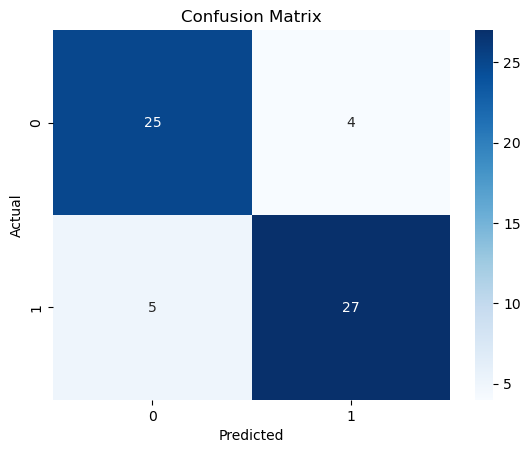

In [72]:
#Create a confusion matrix
lcm = confusion_matrix(y_test,ly_pred)

sns.heatmap(lcm,annot=True,cmap= "Blues", fmt ="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Number of rightly Predicted customers with heart disease = 25 TRUEPOSITIVE-TP
Number of wrongly Predicted customers with NO heart disease = 5 -FALSENEGATIVE-FN
Number of wrong Predicted with heart diseases = 4 - FAKE POSITIVE-FP
Number of rightly Predicted with NO heart disease = 27- TRUENEGATIVE-TN

In [76]:
# Model Building2
#Random Forest Classifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfy_pred=rfc.predict(X_test)

print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test,rfy_pred))
print("Precision:", precision_score(y_test,rfy_pred))
print("Recall:", recall_score(y_test,rfy_pred))
print("F1-score:" , f1_score(y_test,rfy_pred))
print("AUC-ROC:",roc_auc_score(y_test,rfy_pred))

Logistic Regression
Accuracy: 0.8524590163934426
Precision: 0.8484848484848485
Recall: 0.875
F1-score: 0.8615384615384616
AUC-ROC: 0.8512931034482758


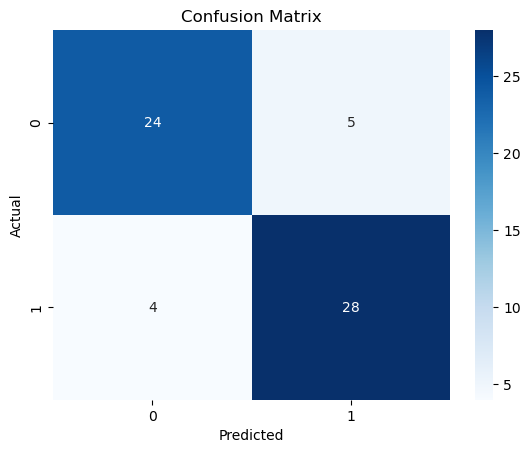

In [77]:
#Create a confusion matrix
lcm = confusion_matrix(y_test,rfy_pred)

sns.heatmap(lcm,annot=True,cmap= "Blues", fmt ="g")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


Number of rightly Predicted customers with heart disease = 24 TRUEPOSITIVE-TP
Number of wrongly Predicted customers with NO heart disease = 4 -FALSENEGATIVE-FN
Number of wrong Predicted with heart diseases = 5 - FAKE POSITIVE-FP
Number of rightly Predicted with NO heart disease = 28- TRUENEGATIVE-TN

In [78]:
#8 Machine learning Algorithms will be applied to the dataset

classifiers = [[XGBClassifier(),'XGB Classifier'],
               [RandomForestClassifier(), 'Random Forest'],
               [KNeighborsClassifier(),'K-Nearest Neighbours'],
               [SGDClassifier(),'SGD Classifier'],
               [SVC(),'SVC'],
               [GaussianNB(),"Naive Bayes"],
               [DecisionTreeClassifier(random_state = 42), "Decision tree"],
               [LogisticRegression(),'Logistic Regression']
              ]

In [79]:
classifiers

[[XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...),
  'XGB Classifier'],
 [RandomForestClassifier(), 'Random Forest'],
 [KNeighborsClassifier(), 'K-Nearest Neighbours'],
 [SGDClassifier(), 'SGD Classifier'],
 [SVC(), 'SVC'],
 [GaussianNB(), 'Naive Bayes'],
 [DecisionTree

In [88]:
acc_list ={}
precision_list ={}
recall_list = {}
roc_list = {}

for classifier in classifiers:
    model = classifier[0]
    model.fit(X_train,y_train)
    model_name = classifier[1]

    pred= model.predict(X_test)

    a_score = accuracy_score(y_test,pred)
    p_score = precision_score(y_test,pred)
    r_score = recall_score(y_test,pred)
    roc_score = roc_auc_score(y_test,pred)

    acc_list[model_name] = ([str(round(a_score*100,2)) + '%'])
    precision_list[model_name] = ([str(round(p_score*100, 2)) + '%'])
    recall_list[model_name] = ([str(round(r_score*100, 2)) + '%'])
    roc_list[model_name] = ([str(round(roc_score*100, 2)) + '%'])

    if model_name != classifiers[-1][1]:
        print('')

In [90]:
acc_list

{'XGB Classifier': ['81.97%'],
 'Random Forest': ['86.89%'],
 'K-Nearest Neighbours': ['75.41%'],
 'SGD Classifier': ['72.13%'],
 'SVC': ['65.57%'],
 'Naive Bayes': ['86.89%'],
 'Decision tree': ['85.25%'],
 'Logistic Regression': ['85.25%']}

In [95]:
print("Accuracy Score")
sl = pd.DataFrame(acc_list)
sl.head()


Accuracy Score


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,81.97%,86.89%,75.41%,72.13%,65.57%,86.89%,85.25%,85.25%


In [92]:
print("Precision")
sl = pd.DataFrame(precision_list)
sl.head()

Precision


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,86.21%,85.29%,79.31%,89.47%,65.71%,90.0%,92.59%,87.1%


In [ ]:
print("Recall")
sl = pd.DataFrame(recall_list)
sl.head()

In [93]:
print("ROC_auc")
sl = pd.DataFrame(roc_list)
sl.head()

ROC_auc


,XGB Classifier,Random Forest,K-Nearest Neighbours,SGD Classifier,SVC,Naive Bayes,Decision tree,Logistic Regression
0,82.17%,86.69%,75.59%,73.11%,65.25%,87.02%,85.61%,85.29%
